# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [28]:
df_new=pd.read_excel('time.xlsx')

to add the new columns to the dataframe, we need to convert the lists to a pandas series so that the empty rows will be 
filled as 'NAN'

Drop the original last column

In [42]:
df_new=df_new.iloc[:,:-1]

In [43]:
df_new

,T,G,P
0,3,0.0,0.0
1,3,0.0,0.0
2,3,0.0,0.0
3,3,0.0,0.0
4,3,0.0,0.0
...,...,...,...
97195,21,0.0,0.0
97196,21,0.0,0.0
97197,21,0.0,0.0
97198,21,0.0,0.0


In [48]:
m = df_new['T'].between(8,16,inclusive=False)
g = m.ne(m.shift()).cumsum()
df_new['G_new'] = df_new.groupby(g)['G'].transform('mean')
#export=df.to_excel(r'C:\Users\zahid.hussain\exportdata.xlsx', index=None, header=True)

In [50]:
x = df_new['T'].between(8,16,inclusive=False)
p = x.ne(x.shift()).cumsum()
df_new['P_new'] = df_new.groupby(p)['P'].transform('mean')
#export=df.to_excel(r'C:\Users\zahid.hussain\exportdata.xlsx', index=None, header=True)
df_new

,T,G,P,G_new,P_new
0,3,0.0,0.0,56.205594,123.328396
1,3,0.0,0.0,56.205594,123.328396
2,3,0.0,0.0,56.205594,123.328396
3,3,0.0,0.0,56.205594,123.328396
4,3,0.0,0.0,56.205594,123.328396
...,...,...,...,...,...
97195,21,0.0,0.0,45.375258,9.997262
97196,21,0.0,0.0,45.375258,9.997262
97197,21,0.0,0.0,45.375258,9.997262
97198,21,0.0,0.0,45.375258,9.997262


In [57]:

df_new

,T,G_new,P_new
0,3,56.205594,123.328396
1,3,56.205594,123.328396
2,3,56.205594,123.328396
3,3,56.205594,123.328396
4,3,56.205594,123.328396
...,...,...,...
97195,21,45.375258,9.997262
97196,21,45.375258,9.997262
97197,21,45.375258,9.997262
97198,21,45.375258,9.997262


exporting to excel for verification

In [58]:
export=df_new.to_excel(r'C:\Users\zahid.hussain\g_p_avg.xlsx', index=None, header=True)

to get the unique average values between 8-16 (9-15 actual readingds)

In [90]:
z=df_new.P_new.unique()

In [103]:
p=z[1::2]

In [105]:
y=df_new.G_new.unique()

In [111]:
g=y[1::2]

create the new dataframe

In [166]:
df_new = pd.DataFrame({'g_avg':g, 'p_avg':p})
df_new

,g_avg,p_avg
0,140.108917,308.404302
1,236.312436,519.628464
2,184.061955,403.916031
3,126.781479,279.268931
4,206.944010,455.222386
...,...,...
65,136.385092,30.025310
66,286.297398,62.956717
67,301.259807,66.244266
68,136.058879,30.015204


In [167]:
df_new = df_new.reset_index()

Carrying out the K-means model testing

In [168]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [169]:
y_pred=km.fit_predict(df_new)
y_pred

array([8, 1, 5, 8, 5, 3, 5, 3, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 7, 5, 1, 8,
       7, 7, 7, 7, 3, 6, 6, 6, 2, 2, 2, 6, 6, 2, 2, 9, 9, 6, 2, 9, 4, 4,
       9, 9, 9, 9, 9, 9, 9, 4, 9, 4, 9, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 4, 0])

In [170]:
df_new['cluster']=y_pred
df_new.head()

,index,g_avg,p_avg,cluster
0,0,140.108917,308.404302,8
1,1,236.312436,519.628464,1
2,2,184.061955,403.916031,5
3,3,126.781479,279.268931,8
4,4,206.944010,455.222386,5


In [171]:
km.cluster_centers_

array([[ 62.9       , 306.50994864, 101.0779505 ],
       [ 12.22222222, 276.70452966, 518.09453915],
       [ 34.        , 277.89702579, 333.97889607],
       [ 12.66666667, 430.41517857, 806.24127302],
       [ 54.44444444, 181.29022283, 105.23088881],
       [  9.57142857, 196.61287279, 400.25311054],
       [ 31.66666667, 330.33411711, 433.43015387],
       [ 22.4       , 418.43724843, 662.48827905],
       [  8.        , 152.71155825, 294.16998913],
       [ 45.91666667, 257.37910841, 215.40885042]])

Text(0, 0.5, 'P')

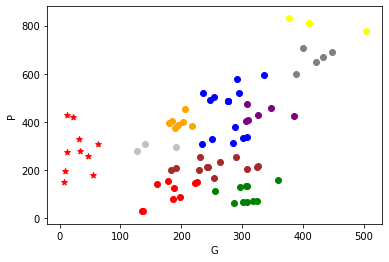

In [172]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]
df3=df_new[df_new.cluster==3]
df4=df_new[df_new.cluster==4]
df5=df_new[df_new.cluster==5]
df6=df_new[df_new.cluster==6]
df7=df_new[df_new.cluster==7]
df8=df_new[df_new.cluster==8]
df9=df_new[df_new.cluster==9]

plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='b')
plt.scatter(df2.g_avg,df2.p_avg, color='blue')
plt.scatter(df3.g_avg,df3.p_avg, color='yellow')
plt.scatter(df4.g_avg,df4.p_avg, color='red')
plt.scatter(df5.g_avg,df5.p_avg, color='orange')
plt.scatter(df6.g_avg,df6.p_avg, color='purple')
plt.scatter(df7.g_avg,df7.p_avg, color='grey')
plt.scatter(df8.g_avg,df8.p_avg, color='silver')
plt.scatter(df9.g_avg,df9.p_avg, color='brown')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

data nomalisation

In [126]:
scaler= MinMaxScaler()
scaler.fit(df_new[['g_avg']])
df_new[['g_avg']]=scaler.transform(df_new[['g_avg']])
scaler.fit(df_new[['p_avg']])
df_new[['p_avg']]=scaler.transform(df_new[['p_avg']])
df_new.head()

,index,g_avg,p_avg,cluster
0,0,0.035368,0.347784,9
1,1,0.290674,0.611660,8
2,2,0.152011,0.467104,2
3,3,0.000000,0.311386,9
4,4,0.212736,0.531200,2


In [127]:
y_pred=km.fit_predict(df_new)
y_pred

array([8, 8, 3, 8, 3, 3, 3, 3, 9, 9, 9, 7, 7, 7, 9, 9, 9, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6,
       6, 6, 6, 6])

In [128]:
df_new['cluster']=y_pred
df_new.head()

,index,g_avg,p_avg,cluster
0,0,0.035368,0.347784,8
1,1,0.290674,0.611660,8
2,2,0.152011,0.467104,3
3,3,0.000000,0.311386,8
4,4,0.212736,0.531200,3


Text(0, 0.5, 'P')

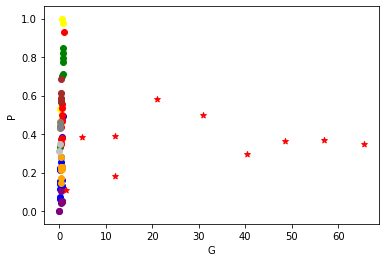

In [129]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]
df3=df_new[df_new.cluster==3]
df4=df_new[df_new.cluster==4]
df5=df_new[df_new.cluster==5]
df6=df_new[df_new.cluster==6]
df7=df_new[df_new.cluster==7]
df8=df_new[df_new.cluster==8]
df9=df_new[df_new.cluster==9]

plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='b')
plt.scatter(df2.g_avg,df2.p_avg, color='blue')
plt.scatter(df3.g_avg,df3.p_avg, color='yellow')
plt.scatter(df4.g_avg,df4.p_avg, color='red')
plt.scatter(df5.g_avg,df5.p_avg, color='orange')
plt.scatter(df6.g_avg,df6.p_avg, color='purple')
plt.scatter(df7.g_avg,df7.p_avg, color='grey')
plt.scatter(df8.g_avg,df8.p_avg, color='silver')
plt.scatter(df9.g_avg,df9.p_avg, color='brown')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

Implementing a the elbow technique to find the optimal K value

In [130]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_new[['g_avg','p_avg']])
    sse.append(km.inertia_)
sse

[7.597576596865716,
 3.5721048090917513,
 2.2524309047568627,
 1.4753048310318515,
 1.035037730915085,
 0.8411656892631573,
 0.6997079475645347,
 0.613876271548053,
 0.5506619695493731,
 0.49442428560902685]

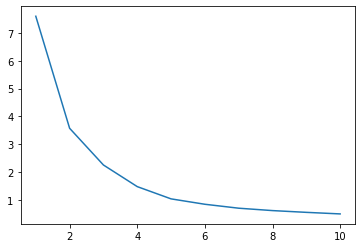

In [131]:
plt.plot(k_range,sse)

In [136]:
km=KMeans(n_clusters=2)
y_pred=km.fit_predict(df_new[['g_avg','p_avg']])

In [137]:
df_new['cluster']=y_pred

Text(0, 0.5, 'P')

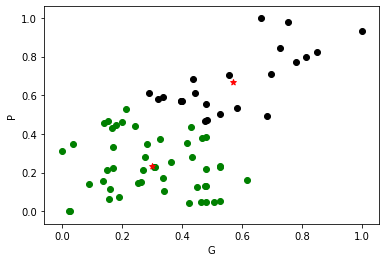

In [138]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]


plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='black')
plt.scatter(df2.g_avg,df2.p_avg, color='y')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

In [135]:
df_new['g_avg'].describe()

count    70.000000
mean      0.389281
std       0.212993
min       0.000000
25%       0.220063
50%       0.397618
75%       0.483548
max       1.000000
Name: g_avg, dtype: float64